## HOMEWORK 4: Тема “Обучение без учителя” (Lesson 8)

### Задание1

1. Импортируйте библиотеки pandas, numpy и matplotlib.
2. Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
3. Создайте датафреймы X и y из этих данных.
4. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
5. Масштабируйте данные с помощью StandardScaler.
6. Постройте модель TSNE на тренировочный данных с параметрами:
    * n_components=2, learning_rate=250, random_state=42.
    * Постройте диаграмму рассеяния на этих данных.

In [104]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from pylab import rcParams as rc

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [105]:
from sklearn.datasets import load_boston
boston = load_boston()

In [106]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

X_train_scaled = pd.DataFrame(data = scaler.fit_transform(X_train), columns=boston.feature_names)
X_test_scaled = pd.DataFrame(data = scaler.fit_transform(X_test), columns=boston.feature_names)

In [108]:
from sklearn.manifold import TSNE

In [113]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=100)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


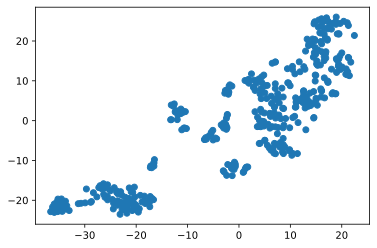

In [119]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2.

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
1. Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE
2. Раскрасьте точки из разных кластеров разными цветами.
3. Вычислите средние значения price и CRIM в разных кластерах.

In [228]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter = 100, random_state= 42)

Kmeans_clust = kmeans.fit_predict(X_train_scaled)

clusters_train = sorted(pd.Series(Kmeans_clust).unique())
clusters_train

[0, 1, 2]

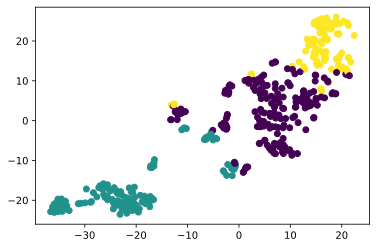

In [131]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = Kmeans_clust)

plt.show()

In [176]:
print('Кластер 0: {}'.format(y_train.loc[Kmeans_clust == 0, 'Price'].mean()))
print('Кластер 1: {}'.format(y_train.loc[Kmeans_clust == 1, 'Price'].mean()))

Кластер 0: 24.958115183246072
Кластер 1: 16.165354330708666


In [168]:
print('Кластер 0: {}'.format(X_train.loc[Kmeans_clust == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[Kmeans_clust == 1, 'CRIM'].mean()))

Кластер 0: 0.42166020942408367
Кластер 1: 10.797028425196853


### Задание 3*

1. Примените модель KMeans, построенную в предыдущем задании,к данным из тестового набора.
2. Вычислите средние значения price и CRIM в разных кластерах на тестовых данных

In [231]:
Kmeans_cluster_test = kmeans.fit_predict(X_test_scaled)
Kmeans_cluster_test
clusters_test = sorted(pd.Series(Kmeans_cluster_test).unique())
clusters_test

[0, 1, 2]

In [232]:
print('Кол-во кластеров для обучения: {}'.format(len(clusters_train)))

for i in range(len(clusters_train)):
    print('test\tPrice_mean\tКластер {}: {}'.format(clusters_train[i], y_test.loc[Kmeans_cluster_test == clusters_train[i], 'Price'].mean()))
for j in range(len(clusters_train)):
    print('test\tCRIM_mean\tКластер {}: {}'.format(clusters_train[j],X_test.loc[Kmeans_cluster_test == clusters_train[j], 'CRIM'].mean()))
    

Кол-во кластеров для обучения: 3
test	Price_mean	Кластер 0: 16.710526315789473
test	Price_mean	Кластер 1: 21.652
test	Price_mean	Кластер 2: 33.871428571428574
test	CRIM_mean	Кластер 0: 9.419181842105264
test	CRIM_mean	Кластер 1: 0.2244212
test	CRIM_mean	Кластер 2: 0.08618571428571427


In [233]:
print('Кол-во кластеров для теста: {}'.format(len(clusters_train)))

for i in range(len(clusters_train)):
    print('train\tPrice_mean\tКластер {}: {}'.format(clusters_train[i], y_test.loc[Kmeans_cluster_test == clusters_train[i], 'Price'].mean()))
for j in range(len(clusters_train)):
    print('train\tCRIM_mean\tКластер {}: {}'.format(clusters_train[j],X_test.loc[Kmeans_cluster_test == clusters_train[j], 'CRIM'].mean()))
    

Кол-во кластеров для теста: 3
train	Price_mean	Кластер 0: 16.710526315789473
train	Price_mean	Кластер 1: 21.652
train	Price_mean	Кластер 2: 33.871428571428574
train	CRIM_mean	Кластер 0: 9.419181842105264
train	CRIM_mean	Кластер 1: 0.2244212
train	CRIM_mean	Кластер 2: 0.08618571428571427
